In [476]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [477]:
train_df = pd.read_csv('Final_Train_Dataset.csv')
test_df = pd.read_csv('Final_Test_Dataset.csv')

In [478]:
train_df.shape

(19802, 9)

In [479]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 9 columns):
Unnamed: 0              19802 non-null int64
experience              19802 non-null object
job_description         15384 non-null object
job_desig               19802 non-null object
job_type                4797 non-null object
key_skills              19801 non-null object
location                19802 non-null object
salary                  19802 non-null object
company_name_encoded    19802 non-null int64
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [480]:
train_df.tail()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
19797,19797,12-18 yrs,NaN,"Director, Medical Coding Training",NaN,"Medical Coding, ICD - 10, US Healthcare, RCM, ...",Hyderabad,15to25,2245
19798,19798,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, part time, home base, work fr...","Mumbai, Bengaluru, Chennai, Hyderabad, Dehradu...",0to3,4966
19799,19799,8-13 yrs,Annuities Domain experience is mandatory;Work ...,PM- C#/ .Net ( Annuity/ Insurance Domain),NaN,"SQL Server, VB.NET, C#, .Net, C#.Net, Oracle S...",Hyderabad,15to25,4272
19800,19800,1-3 yrs,- By plugging into our market-leading global n...,Consultant - Internal Audit,NaN,"accounting, internal audit, auditing, risk adv...",Pune,10to15,1793
19801,19801,2-5 yrs,- 3-5 years experience with the end to end pro...,Unity 3D Developer - Mobile Games Development,NaN,"IOS, XCode, Apple, Version Control, Perforce, ...",Hyderabad,10to15,1349


In [481]:
train_df['salary'].value_counts()

10to15    4500
15to25    4125
6to10     3533
0to3      3245
3to6      2824
25to50    1575
Name: salary, dtype: int64

In [482]:
train_df['exp'] = train_df['experience'].str.rstrip('yrs')
train_df['min_exp'] = train_df['exp'].str.split('-').str[0].astype(int)
train_df['max_exp'] = train_df['exp'].str.split('-').str[1].astype(int)
train_df['avg_exp'] = train_df['min_exp'] + train_df['max_exp']/2

In [483]:
train_df['skill1'] = train_df['key_skills'].str.split(',').str[0]
train_df['skill2'] = train_df['key_skills'].str.split(',').str[1]
train_df['skill3'] = train_df['key_skills'].str.split(',').str[2]
#train_df['skill4'] = train_df['key_skills'].str.split(',').str[3]
#train_df['skill5'] = train_df['key_skills'].str.split(',').str[4]

In [484]:
train_df.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,exp,min_exp,max_exp,avg_exp,skill1,skill2,skill3
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687,5-7,5,7,8.5,team skills,communication skills,analytical skills
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458,10-17,10,17,18.5,ppc,logistics,inventory management
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195,5-9,5,9,9.5,HR Analytics,Employee Engagement,Training
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313,7-10,7,10,12.0,SQL,Javascript,Automation
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305,1-3,1,3,2.5,accounting,finance,cash flow


In [485]:
test_df.shape, train_df.shape

((6601, 7), (19802, 16))

In [486]:
train_df['max_exp'].value_counts()

5     2912
8     2250
10    2202
6     1978
7     1745
12    1293
4     1148
9     1090
3     1060
15     699
2      609
13     574
11     508
20     349
14     320
1      298
18     223
0      151
16     124
25      74
17      71
22      60
19      15
23      15
24      12
21      10
30       7
26       3
28       2
Name: max_exp, dtype: int64

In [487]:
train_df['min_exp'].value_counts()

2     3196
3     2713
5     2330
1     2266
4     1911
0     1653
8     1253
10    1139
7     1077
6     1060
12     362
9      323
15     205
11     119
13      90
14      55
18      21
20      13
17       6
16       6
19       3
23       1
Name: min_exp, dtype: int64

In [488]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 7 columns):
experience              6601 non-null object
job_description         5079 non-null object
job_desig               6601 non-null object
job_type                1637 non-null object
key_skills              6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
dtypes: int64(1), object(6)
memory usage: 361.1+ KB


In [489]:
X_train = train_df.drop(columns=['Unnamed: 0','job_description','key_skills','experience','exp','avg_exp'])
X_train = X_train.fillna(value='')

In [490]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 10 columns):
job_desig               19802 non-null object
job_type                19802 non-null object
location                19802 non-null object
salary                  19802 non-null object
company_name_encoded    19802 non-null int64
min_exp                 19802 non-null int32
max_exp                 19802 non-null int32
skill1                  19802 non-null object
skill2                  19802 non-null object
skill3                  19802 non-null object
dtypes: int32(2), int64(1), object(7)
memory usage: 1.4+ MB


In [491]:
labelenc = LabelEncoder()
X_train = X_train.apply(labelenc.fit_transform)

In [492]:
X_train[0:10]

,job_desig,job_type,location,salary,company_name_encoded,min_exp,max_exp,skill1,skill2,skill3
0,9104,0,597,5,3687,5,7,3929,2947,3065
1,4395,0,1412,1,458,10,17,3514,3603,4008
2,3058,3,525,2,4195,5,9,979,812,2806
3,1087,3,114,1,313,7,10,2000,1256,209
4,10385,0,811,4,1305,1,3,2473,3277,3298
5,9583,0,1229,5,4428,5,10,2469,3198,5066
6,1149,3,525,3,1988,13,15,889,1687,2723
7,6025,0,1301,5,1793,6,10,70,1197,205
8,7236,0,11,0,3398,1,3,2984,3411,3188
9,8076,0,180,2,3444,2,6,2477,3277,3124


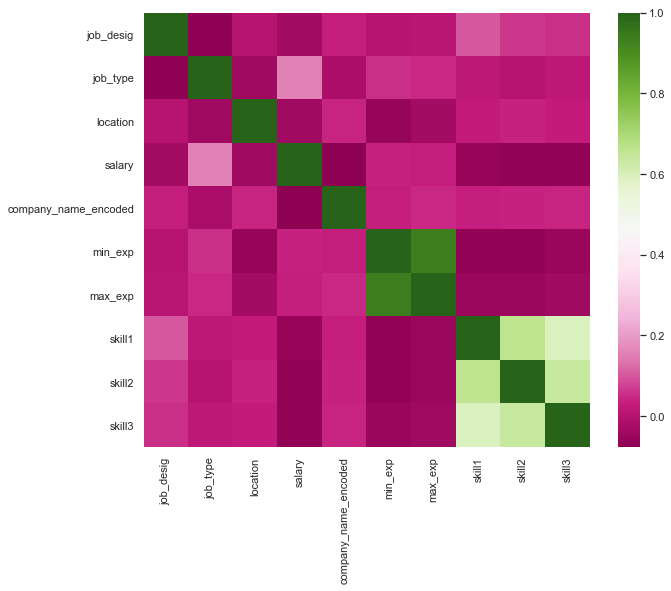

In [493]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), cmap="PiYG");

In [494]:
y_train = X_train['salary']

In [495]:
y_train.head()

0    5
1    1
2    2
3    1
4    4
Name: salary, dtype: int64

In [496]:
X_train = X_train.drop(columns=['salary'])

In [497]:
X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, 
                     test_size=0.3, random_state=17)

In [498]:
X_train.columns

Index(['job_desig', 'job_type', 'location', 'company_name_encoded', 'min_exp',
       'max_exp', 'skill1', 'skill2', 'skill3'],
      dtype='object')

In [499]:
X_train_part.shape, y_train_part.shape, X_valid.shape

((13861, 9), (13861,), (5941, 9))

In [500]:
y_train_part.head()

994      3
5800     5
807      2
11167    1
19673    0
Name: salary, dtype: int64

In [501]:
dtree = DecisionTreeClassifier( random_state = 17)
dtree.fit(X_train_part, y_train_part)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [502]:
y_pred = dtree.predict(X_valid)
accu1 = accuracy_score(y_valid, y_pred)
print(accu1)

0.3213263760309712


In [503]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score

params = {'max_depth': np.arange(2, 11), 'max_features': [3,4,5,6]}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
cv_dtree = GridSearchCV(estimator=dtree, param_grid=params, cv=skf, verbose=1)

In [504]:
cv_dtree.fit(X_train_part, y_train_part)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    4.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [505]:
cv_score = cross_val_score(estimator=cv_dtree, X=X_train_part, y=y_train_part, cv=skf)
print(cv_score)
print(cv_score.mean())

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.4s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.4s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.4s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.4s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[0.42666667 0.39668229 0.40512266 0.41104294 0.4133574 ]
0.4105743921683033


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.1s finished


In [506]:
cv_dtree.fit(X_train, y_train)
print( cv_dtree.best_params_ )
print( cv_dtree.best_estimator_ )
print( 'Best score by CV: ', cv_dtree.best_score_ )
cv_y_pred = cv_dtree.predict(X_valid)
accu2 = accuracy_score(y_valid, cv_y_pred)
print("Validation Set Accuracy after hyperparam tuning (Depth=2 to 10): %.2f%%" % (accu2 * 100.0))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 7, 'max_features': 6}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')
Best score by CV:  0.417988082011918
Validation Set Accuracy after hyperparam tuning (Depth=2 to 10): 43.17%


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    5.2s finished


In [507]:
cv_y_pred

array([5, 5, 2, ..., 2, 0, 3], dtype=int64)

In [508]:
cv_dtree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [509]:
test_df['exp'] = test_df['experience'].str.rstrip('yrs')
test_df['min_exp'] = test_df['exp'].str.split('-').str[0].astype(int)
test_df['max_exp'] = test_df['exp'].str.split('-').str[1].astype(int)
test_df['avg_exp'] = test_df['min_exp'] + test_df['max_exp']/2

In [510]:
test_df['skill1'] = test_df['key_skills'].str.split(',').str[0]
test_df['skill2'] = test_df['key_skills'].str.split(',').str[1]
test_df['skill3'] = test_df['key_skills'].str.split(',').str[2]
#test_df['skill4'] = test_df['key_skills'].str.split(',').str[3]
#test_df['skill5'] = test_df['key_skills'].str.split(',').str[4]

In [511]:
test_df.head()

,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded,exp,min_exp,max_exp,avg_exp,skill1,skill2,skill3
0,7-12 yrs,Professional experience in Java/J2EE based ser...,IT Technology Senior Consultant/java/ J2ee/ Se...,NaN,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066,7-12,7,12,13.0,Java,J2Ee,Tomcat
1,0-5 yrs,We are looking for 20+ Fresher/Experienced Can...,Medical Billing Process | International KPO | ...,NaN,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629,0-5,0,5,2.5,Medical Billing,Insurance Processing,NaN
2,3-6 yrs,Should understand overall integration framewor...,Oracle Sales Cloud Functional Consultant,NaN,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448,3-6,3,6,6.0,Oracle Sales,Functional Consultancy,Troubleshooting Skills
3,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711,0-3,0,3,1.5,offline,online,internet
4,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tec...,NaN,"voice support, analytical skills, Process asso...",Hyderabad,40,0-5,0,5,2.5,voice support,analytical skills,Process associate


In [512]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 14 columns):
experience              6601 non-null object
job_description         5079 non-null object
job_desig               6601 non-null object
job_type                1637 non-null object
key_skills              6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
exp                     6601 non-null object
min_exp                 6601 non-null int32
max_exp                 6601 non-null int32
avg_exp                 6601 non-null float64
skill1                  6601 non-null object
skill2                  6534 non-null object
skill3                  6410 non-null object
dtypes: float64(1), int32(2), int64(1), object(10)
memory usage: 670.5+ KB


In [513]:
X_test = test_df.drop(columns = ['job_description','key_skills','experience','exp','avg_exp'])
X_test = X_test.fillna(value='')

In [514]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 9 columns):
job_desig               6601 non-null object
job_type                6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
min_exp                 6601 non-null int32
max_exp                 6601 non-null int32
skill1                  6601 non-null object
skill2                  6601 non-null object
skill3                  6601 non-null object
dtypes: int32(2), int64(1), object(6)
memory usage: 412.6+ KB


In [515]:
X_test = X_test.apply(labelenc.fit_transform)

In [516]:
y_pred = cv_dtree.predict(X_test)

In [517]:
y_pred.shape

(6601,)

In [518]:
y_pred[0:5]

array([2, 0, 1, 0, 0], dtype=int64)

In [519]:
#convert the predictions into file format as required for submission
def predictionstofile( y_pred, filename ):
    #convert series to dataframe
    df = pd.DataFrame(y_pred)
    df.columns = ['sal']
    
    #not the best way, but mapping it back to string so as to be able to make a submission
    df['sal'] = df['sal'].astype(str)
    vals_to_replace = {'0':'0to3', '1':'10to15', '2':'15to25', '3':'25to50', '4':'3to6', '5':'6to10'}
    df['salary'] = df['sal'].map(vals_to_replace)
    
    df = df.drop(columns=['sal'])
    df.to_csv(filename)
    return

In [520]:
predictionstofile(y_pred, 'sub7.csv')

In [521]:
X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, test_size=0.3, random_state=17)

In [522]:
X_train_part.head()

,job_desig,job_type,location,company_name_encoded,min_exp,max_exp,skill1,skill2,skill3
994,7943,3,525,1353,3,8,644,106,406
5800,10988,0,1027,2491,7,10,3128,3831,3388
807,5611,0,114,5032,8,12,1174,1887,2162
11167,6238,0,811,2550,6,8,588,312,2239
19673,5153,0,811,3055,0,4,2778,2978,3519


In [523]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
logit = LogisticRegression(random_state=17, class_weight='balanced')

logit_pipe = Pipeline([('scaler', scaler), ('logit', logit)])
logit_pipe_params = {'logit__C': np.logspace(-8, 8, 17)}

In [524]:
pipeline_cv = GridSearchCV(estimator=logit_pipe, param_grid=logit_pipe_params, cv=skf, verbose=1)
cv_score = cross_val_score(estimator=pipeline_cv, X= X_train_part, y=y_train_part, cv=skf)
print(cv_score)
print(cv_score.max(), cv_score.mean())

pipeline_cv.fit(X_train, y_train)
pipeline_cv.score
pipeline_cv.best_estimator_, pipeline_cv.best_params_, pipeline_cv.best_score_

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    4.7s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    4.8s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    4.7s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    5.6s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    5.2s finished


[0.39423423 0.39596105 0.37950938 0.40129917 0.3967509 ]
0.40129916997473836 0.39355094785132144
Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   11.9s finished


(Pipeline(memory=None,
      steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logit', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=17,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
 {'logit__C': 1.0},
 0.3882436117563882)

In [525]:
y_pred_pp = pipeline_cv.predict(X_test)
predictionstofile( y_pred_pp, 'sub8.csv')

In [526]:
y_pred_pp[100:110]

array([5, 5, 2, 0, 4, 4, 1, 0, 3, 3], dtype=int64)

## Results until now
 
23/1 - Decision tree has given results only for an accuracy of 0.40 - on submission, gave only 0.248 score on the leaderboard.
Let us try other options.
 
24/1 - Added another feature back - job type. Accuracy of 0.414 gave score of 0.276
 
25/1 - Split up experience as min and max experience. Accuracy of 0.4256640743359257. Score = 0.374034237

 ### Iter 4 - Pipeline (scaler+log regression) giving 0.3885971114028886 accuracy and a submission score of 0.389183457

Iter 5 - 5 skills and decision tree, CV score = 0.41834158165841834; submission score = 0.385093168 

Iter 6 - 5 skills and LR, CV score = 0.3907686092313908; submission score = 0.386305105

Iter 7 - 3skills decision tree, cv score = 0.417988082011918, submission score = 0.372519315

Iter 8 - 3skills log regression, cv score = 0.3882436117563882, submission score = 0.384790183


In [532]:
X_test['skill1'].value_counts().size

2274